<a href="https://colab.research.google.com/github/Anpr1211/R-and-Python-Gigs/blob/master/EDA_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# importing libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# reading dataset directly from URL
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls")

In [0]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [0]:
# change column names for the sake of simplicity
df.columns = ["Cement", "Blast Furnace", "Fly Ash", "Water", "Superplasticizer", "Coarse Aggregate", "Fine Aggregate", "Age", "Concrete_Compressive_Strength"]

In [0]:
df.head()

,Cement,Blast Furnace,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [0]:
# a look at the statistics
df.describe()

,Cement,Blast Furnace,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete_Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [0]:
# skewness
df.skew()

Cement                           0.509517
Blast Furnace                    0.800737
Fly Ash                          0.537445
Water                            0.074324
Superplasticizer                 0.908113
Coarse Aggregate                -0.040206
Fine Aggregate                  -0.252979
Age                              3.269177
Concrete_Compressive_Strength    0.416922
dtype: float64

For this dataframe, only the feature "Age" is positive skewed. Other than that, all the variables can be considered to have a symmetric distribution.

So only for "Age", the median should be considered for imputation of missing values. The mean can be used for all other variables.

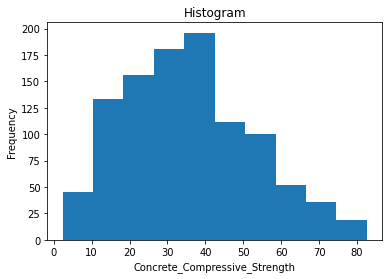

In [0]:
plt.hist(df.Concrete_Compressive_Strength)
plt.title("Histogram")
plt.xlabel("Concrete_Compressive_Strength")
plt.ylabel("Frequency")
plt.show()

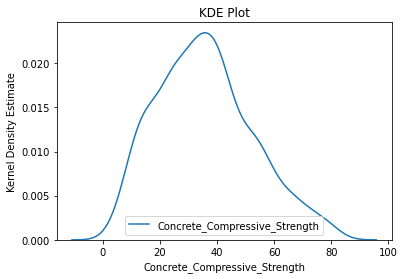

In [0]:
sns.kdeplot(df.Concrete_Compressive_Strength)
plt.title("KDE Plot")
plt.xlabel("Concrete_Compressive_Strength")
plt.ylabel("Kernel Density Estimate")
plt.show()

The distribution can be considered approximately symmetric.

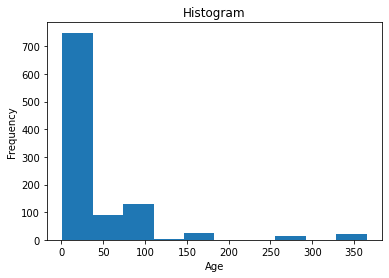

In [0]:
plt.hist(df.Age)
plt.title("Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

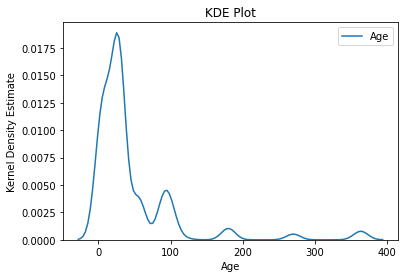

In [0]:
sns.kdeplot(df.Age)
plt.title("KDE Plot")
plt.xlabel("Age")
plt.ylabel("Kernel Density Estimate")
plt.show()

It is clear from the kdeplot that the distribution is positive skewed.

In [0]:
# correlation matrix
df.corr()

,Cement,Blast Furnace,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete_Compressive_Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete_Compressive_Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


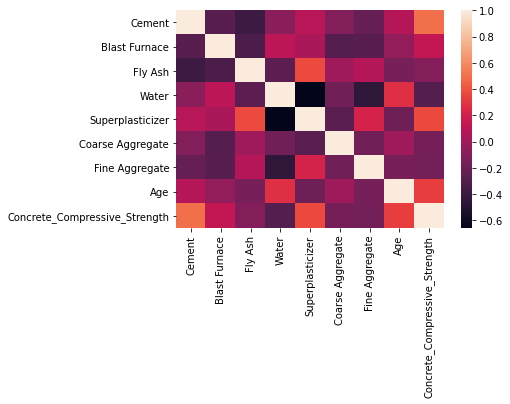

In [0]:
sns.heatmap(df.corr())

"Concrete_Compressive_Strength" seems to share a moderate positive correlation with "Cement", "Superplasticizer" and "Age".

"Superplasticizer" also shares a quite strong negative correlation with "Water". It also shares a moderately strong positive relationship with "Fly Ash".

Other than that, there don't seem to be any more significant relationships.



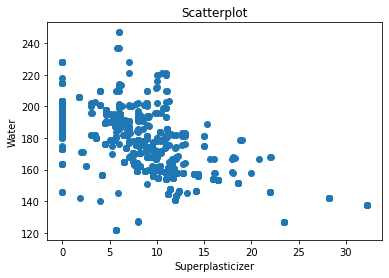

In [0]:
plt.scatter(x=df.Superplasticizer, y=df.Water)
plt.title("Scatterplot")
plt.xlabel("Superplasticizer")
plt.ylabel("Water")
plt.show()

It can be concluded that as the value of "Superplasticizer" increases, the value of "Water" decreases.

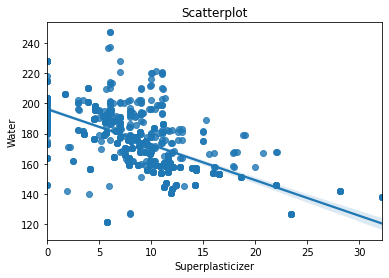

In [0]:
sns.regplot(x="Superplasticizer", y="Water", data=df)
plt.title("Scatterplot")
plt.xlabel("Superplasticizer")
plt.ylabel("Water")
plt.show()

The negative linear relationship is visible in this plot.